Author: Vinícius Antoino Ramos Zecca

LinkedIn: /viniciusarz

Github: /ViniciusARZ

Applications and tests to understand better probability and mathmatical concepts learned during the first course of the **MIT Micro Masters Program in Statistics and Data Science**, called Probability - The Science of Uncertainty and Data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Building and understanding PMF (Probability Mass Function)

<BarContainer object of 10 artists>

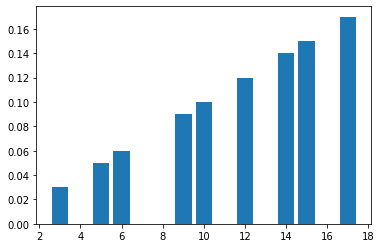

In [ ]:
rdlist = np.random.choice(10, 100, replace=True) #list of random values
df = pd.DataFrame(rdlist)
df = pd.DataFrame(df[0].value_counts()) #transforming a new df for the number of repetitions
df.columns = ['Counts']
df['PMF'] = df['Counts']/len(rdlist) #using the lenght to calculate the prob of each event happening
plt.bar('Counts','PMF',data=df)

Understanding PMF and Probability Ddensity Function (PDF)

\begin{align}
  \begin{cases}
       \frac{1}{b-a} & for \ x\in[a,b] \\
          0 &  otherwise \\
    \end{cases}
    \end{align}

(array([0.01081278, 0.02162557, 0.0648767 , 0.18381733, 0.16219176,
        0.16219176, 0.23788124, 0.11894062, 0.08650227, 0.03243835]),
 array([14.68860231, 15.61343352, 16.53826473, 17.46309594, 18.38792715,
        19.31275837, 20.23758958, 21.16242079, 22.087252  , 23.01208322,
        23.93691443]),
 <a list of 10 Patch objects>)

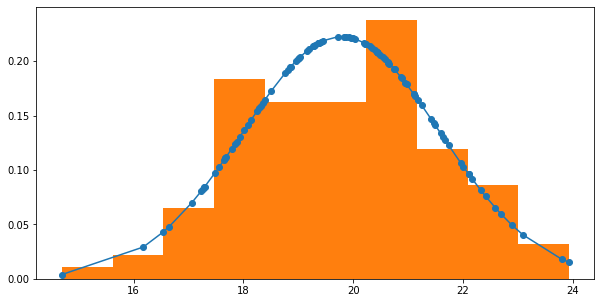

In [ ]:
import scipy.stats as ss
# random mu and sigma just to test
mu=20
sigma=2
h= sorted(np.random.normal(mu,sigma,100))
plt.figure(figsize=(10,5))
fit= ss.norm.pdf(h, np.mean(h), np.std(h)) #plotting the probabilty density function
plt.plot(h,fit,'-o')
plt.hist(h,density=True) #using normalization to the hist

Cumulative Distribution Function (CDF) and PMF
\
\begin{cases}
0&\text{for $x<a$}\\
\frac{x-a}{b-a}&\text{for $x\in[a,b)$}\\
1&\text{for $x\ge b$}\\
\end{cases}


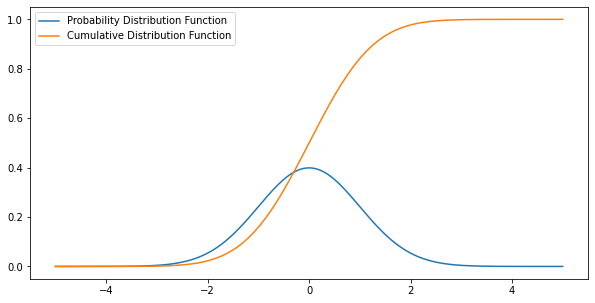

In [ ]:
line = np.linspace(-5, 5, 5000) #equal distribution between ranges
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(line, mu, sigma) # normal probability distribution function
y_cdf = ss.norm.cdf(line, mu, sigma) # normal cumulative distribution function

plt.figure(figsize=(10,5))
plt.plot(line, y_pdf, label = 'Probability Distribution Function')
plt.plot(line, y_cdf, label = 'Cumulative Distribution Function')
leg = plt.legend(loc='upper left')

Taking a look at the cdf from the previous histogram `h`


(array([0.00933464, 0.00933464, 0.04667319, 0.05600783, 0.11201565,
        0.23336594, 0.19602739, 0.18669275, 0.05600783, 0.02800391]),
 array([13.72541702, 14.79669588, 15.86797475, 16.93925361, 18.01053247,
        19.08181134, 20.1530902 , 21.22436907, 22.29564793, 23.3669268 ,
        24.43820566]),
 <a list of 10 Patch objects>)

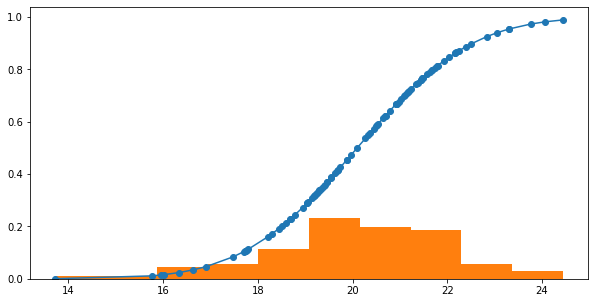

In [ ]:
plt.figure(figsize=(10,5))
fit = ss.norm.cdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h,density=True)

## Integrals & PDF

Ints https://colab.research.google.com/drive/133x0U02OjnK6u4OtB5d83MNEyayoSenZ#scrollTo=69mqyhVfe3bb


https://medium.com/jungletronics/integration-in-python-d6cf4c003b36

###Integrating the a Normal Distribution as a resource of solutions for exercises

---
[Referece](https://moonbooks.org/Articles/How-to-integrate-a-normal-distribution-in-python-/)

In [ ]:
from scipy.integrate import quad
# Normal Distribution

x_min = 0.0
x_max = 16.0

mean = 8.0 
std = 3.0

x = np.linspace(x_min, x_max, 100)

y = ss.norm.pdf(x,mean,std)

def normal_distribution_function(x):
    value = ss.norm.pdf(x,mean,std)
    return value

x1 = mean + std
x2 = mean + 2.0 * std

res, err = quad(normal_distribution_function, x1, x2)

print('Normal Distribution (mean,std):',mean,std)
print('Integration bewteen {} and {} --> '.format(x1,x2),res)

Normal Distribution (mean,std): 8.0 3.0
Integration bewteen 11.0 and 14.0 -->  0.13590512198327787


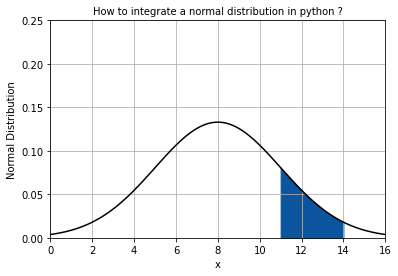

In [ ]:
# plot integration surface
plt.plot(x,y, color='black')
ptx = np.linspace(x1, x2, 10)
pty = ss.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha=1.0)
plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.25)

plt.title('Integration of a Normal Distribut',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

plt.savefig("integrate_normal_distribution.png")
plt.show()

0.9998231654295985


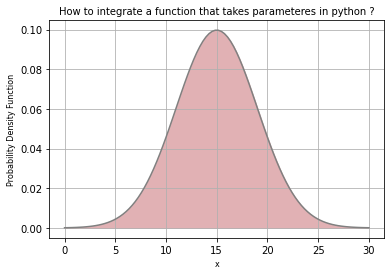

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


def normal_distribution_function(x,mean,std):
    value = scipy.stats.norm.pdf(x,mean,std)
    return value

x_min = 0.0
x_max = 30.0

mean = 15.0 
std = 4.0


ptx = np.linspace(x_min, x_max, 100)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.plot(ptx,pty, color='gray')

plt.fill_between(ptx, pty, color='#e1b1b4', alpha=1.0)

plt.grid()

plt.title('How to integrate a function that takes parameteres in python ?', fontsize=10)
plt.xlabel('x', fontsize=8)
plt.ylabel('Probability Density Function', fontsize=8)

res, err = quad(normal_distribution_function, x_min, x_max, args=(mean,std,))

print(res)

plt.savefig("integrate_function_takes_parameters.png")
plt.show()

## Execise: Limit theorems and probabilistic statistics - Tossing a pair of coins with different colours

N be the number of Heads in 100 tosses of the white coin.

In [4]:
sns.set_style('whitegrid')

# func to simulate a coin_toss
def coin_toss(num_toss, coin_color):
    p_vals_dict = {'white': [0.4, 0.6], 'black': [0.6, 0.4]}
    p_vals = p_vals_dict[coin_color]
    x = np.random.choice([1, 0], size=num_toss, p=p_vals)
    return x

num_sims = 10000
num_toss = 100

Mean is 39.9846
Variance is 24.57776284


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


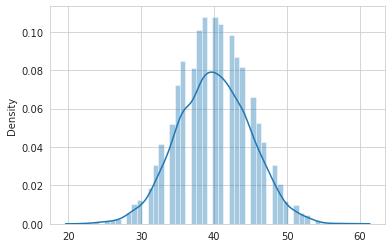

In [9]:
n_vals = []
for i in range(num_sims):
    x = coin_toss(num_toss=num_toss, coin_color='white')
    n_vals.append(np.sum(x))

print("Mean is {}".format(np.mean(n_vals)))
print("Variance is {}".format(np.var(n_vals)))
sns.distplot(n_vals)

Let N be the number of Heads in 100 coin tosses. At each toss, one of the two coins is selected at random (either choice is equally likely), and independently from everything else.


Let N be the number of Heads in 50 tosses of the white coin followed by 50 tosses of the black coin (for a total of 100 tosses).

Mean is 49.9737
Variance is 24.297608309999998


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


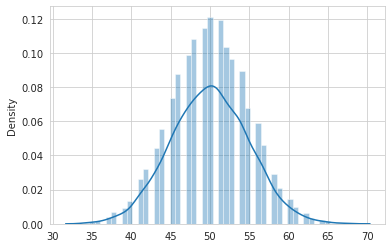

In [16]:
n_vals = []
for i in range(num_sims):
    coin_choice = np.random.choice(['white', 'black'], size=num_toss)
    num_white = np.sum(coin_choice=='white')
    num_black = np.sum(coin_choice=='black')    
    x_white = coin_toss(num_toss=num_white, coin_color='white')
    x_black = coin_toss(num_toss=num_black, coin_color='black')
    x = np.append(x_white,x_black)
    n_vals.append(np.sum(x))

print("Mean is {}".format(np.mean(n_vals)))
print("Variance is {}".format(np.var(n_vals)))
sns.distplot(n_vals)

We select one of the two coins at random: each coin is equally likely to be selected. We then toss the selected coin 100 times, independently, and let N be the number of Heads.


Mean is 50.0725
Variance is 123.37724375


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


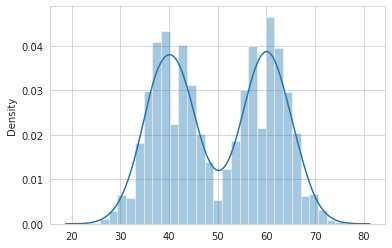

In [18]:
n_vals = []
for i in range(num_sims):
    coin_color = np.random.choice(['white', 'black'])
    x = coin_toss(num_toss=num_toss, coin_color=coin_color)
    n_vals.append(np.sum(x))

plt.plot    
print("Mean is {}".format(np.mean(n_vals)))
print("Variance is {}".format(np.var(n_vals)))
sns.distplot(n_vals)